In [118]:
import scanpy as sc
import os
import anndata as ad
import scipy
import h5py

<h1>10x Directory read</h1>

In [119]:
dirPath = '../data/10X/'
dirs = os.listdir(dirPath)
_10X_list = [sc.read_10x_mtx(os.path.join(dirPath, dir)) for dir in dirs] 

for adata in _10X_list:
    print(adata)

AnnData object with n_obs × n_vars = 1346813 × 32738
    var: 'gene_ids'
AnnData object with n_obs × n_vars = 1548883 × 32738
    var: 'gene_ids'
AnnData object with n_obs × n_vars = 1210703 × 32738
    var: 'gene_ids'
AnnData object with n_obs × n_vars = 1364252 × 32738
    var: 'gene_ids'


<h1>H5</h1>

In [120]:
filesPath = '../data/h5/'
files = os.listdir(filesPath)
h5_list = [sc.read_10x_h5(os.path.join(filesPath, file)) for file in files] 

for adata in h5_list:
    print(adata)

c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python3

AnnData object with n_obs × n_vars = 1346813 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 1548883 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 1210703 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 1364252 × 32738
    var: 'gene_ids', 'feature_types', 'genome'


c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


<h1>H5 filtered</h1>

In [121]:
filesPath = '../data/h5_filtered/'
files = os.listdir(filesPath)
h5_filtered_list = [sc.read_10x_h5(os.path.join(filesPath, file)) for file in files] 

for adata in h5_filtered_list:
    print(adata)

c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python3

AnnData object with n_obs × n_vars = 8743 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 12703 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 6176 × 32738
    var: 'gene_ids', 'feature_types', 'genome'
AnnData object with n_obs × n_vars = 6546 × 32738
    var: 'gene_ids', 'feature_types', 'genome'


c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


<h1>Comparison</h1>

In [122]:
from scipy.sparse import csr_matrix

def compare_sparse_matrices(mat1, mat2):
    """
    Compare two sparse matrices for equality.

    Returns True if they are equal, False otherwise.
    """
    if not issparse(mat1) or not issparse(mat2):
        raise ValueError("Both inputs must be sparse matrices.")
    
    # Ensure the sparse formats match (e.g., csr_matrix)
    if not isinstance(mat1, type(mat2)):
        mat2 = mat2.tocsr() if isinstance(mat1, csr_matrix) else mat2.tocsc()
    
    # Compare shapes first
    if mat1.shape != mat2.shape:
        return False
    
    # Compare data, indices, and indptr (structure of sparse matrix)
    return (
        (mat1 != mat2).nnz == 0  # Check for non-zero differences
        and (mat1.data == mat2.data).all()
        and (mat1.indices == mat2.indices).all()
        and (mat1.indptr == mat2.indptr).all()
    )

def filter_anndata(target_adata, reference_adata):
    # Identify shared cells and genes
    shared_cells = reference_adata.obs.index.intersection(target_adata.obs.index)
    shared_genes = reference_adata.var.index.intersection(target_adata.var.index)

    # Filter the target AnnData object
    filtered_adata = target_adata[shared_cells, shared_genes]

    # Reorder cells and genes to match the reference
    filtered_adata = filtered_adata[reference_adata.obs.index, reference_adata.var.index]

    return filtered_adata


<h3>H5 and 10X comparison</h3>

In [123]:
for i in range(4):
    are_sparse_equal = compare_sparse_matrices(_10X_list[i].X, h5_list[i].X)
    print(f"Sparse matrices for Sample {i+1} are equal?", are_sparse_equal)


Sparse matrices for Sample 1 are equal? True
Sparse matrices for Sample 2 are equal? True
Sparse matrices for Sample 3 are equal? True
Sparse matrices for Sample 4 are equal? True


<h3>H5 filtered and 10X comparison</h3>

In [124]:
for i in range(4):
    filtered = filter_anndata(_10X_list[i], h5_filtered_list[i])
    filtered.var
    are_sparse_equal = compare_sparse_matrices(filtered.X, h5_filtered_list[i].X)
    print(filtered.X.nnz)
    print(h5_filtered_list[i].X.nnz)
    print(f"Sparse matrices for Sample {i+1} are equal?", are_sparse_equal)


18681409
18676022
Sparse matrices for Sample 1 are equal? False
25654204
25646556
Sparse matrices for Sample 2 are equal? False
15394885
15388265
Sparse matrices for Sample 3 are equal? False
18389687
18379725
Sparse matrices for Sample 4 are equal? False


<h3>H5 and H5 filtered comparison</h3>

In [125]:
for i in range(4):
    h5_list[i].var_names_make_unique()
    filtered = filter_anndata(h5_list[i], h5_filtered_list[i])
    are_sparse_equal = compare_sparse_matrices(filtered.X, h5_filtered_list[i].X)
    print(filtered.X.nnz)
    print(h5_filtered_list[i].X.nnz)
    print(f"Sparse matrices for Sample {i+1} are equal?", are_sparse_equal)

18681409
18676022
Sparse matrices for Sample 1 are equal? False
25654204
25646556
Sparse matrices for Sample 2 are equal? False
15394885
15388265
Sparse matrices for Sample 3 are equal? False
18389687
18379725
Sparse matrices for Sample 4 are equal? False


<h1>Checking for Batch effects</h1>

In [126]:
def preprocess_umap_plot(adata_list):
    adatas = {}

    for i, sample in enumerate(adata_list):
        sample_id = f'sample_{i+1}'
        # Calculate total counts per cell
        sample.obs["n_counts"] = sample.X.sum(axis=1).A1  # For sparse matrices
        # Calculate the number of genes per cell (non-zero entries)
        sample.obs["n_genes"] = (sample.X > 0).sum(axis=1).A1  # For sparse matrices
        # Calculate the number of cells expressing each gene
        sample.var["n_cells"] = (sample.X > 0).sum(axis=0).A1  # For sparse matrices


        sample = sample[sample.obs["n_counts"] >= 200,  sample.var["n_cells"] >= 3]
        sample.var_names_make_unique()
        adatas[sample_id] = sample

    adata = ad.concat(adatas, label="sample")
    adata.obs_names_make_unique()

    # # mitochondrial genes, "MT-" for human, "Mt-" for mouse
    adata.var["mt"] = adata.var_names.str.startswith("MT-")
    # ribosomal genes
    adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
    # hemoglobin genes
    adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

    sc.pp.calculate_qc_metrics(
        adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
    )

    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(
        adata,
        color="sample"
    )

<h3>10X</h3>

c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


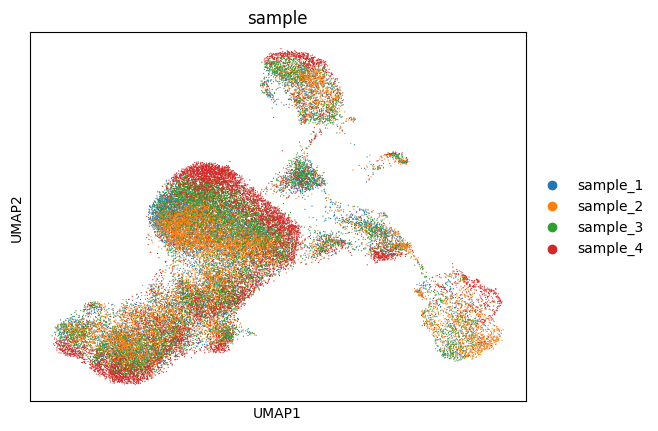

In [127]:
preprocess_umap_plot(_10X_list)


<h3>H5</h3>

c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


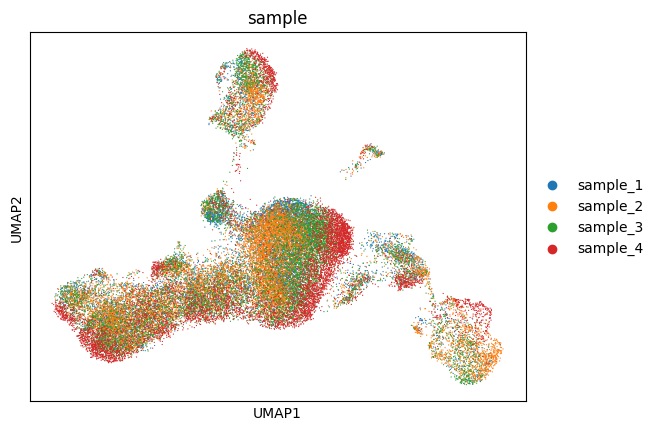

In [128]:
preprocess_umap_plot(h5_list)

<h3>H5 filtered</h3>

c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python312\Lib\site-packages\anndata\_core\anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\Users\zivic\AppData\Local\Programs\Python\Python3

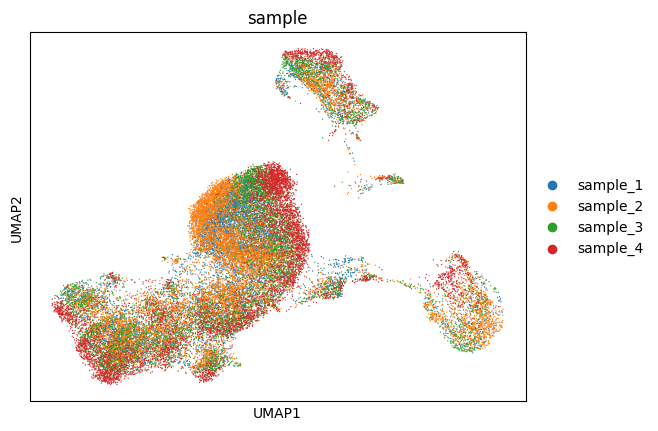

In [129]:
preprocess_umap_plot(h5_filtered_list)